In [23]:
import pandas as pd
%reload_ext autoreload
%autoreload 2

In [24]:
data = pd.read_csv("../data/deputat_daily_features.csv").dropna()

In [25]:
data.columns

Index(['Unnamed: 0', 'deputat', 'party', 'present', 'date', 'Year', 'Month',
       'Week', 'Day', 'Dayofweek', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'present_last_ass', 'present_last_5ass'],
      dtype='object')

In [26]:
data.head()

,Unnamed: 0,deputat,party,present,date,Year,Month,Week,Day,Dayofweek,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,present_last_ass,present_last_5ass
5,5,АДЛЕН ШУКРИ ШЕВКЕД,ДПС,False,2019-01-24,2019,1,4,24,3,False,False,False,False,False,False,0.0,0.6
6,6,АДЛЕН ШУКРИ ШЕВКЕД,ДПС,False,2019-01-25,2019,1,4,25,4,False,False,False,False,False,False,0.0,0.4
7,7,АДЛЕН ШУКРИ ШЕВКЕД,ДПС,False,2019-01-30,2019,1,5,30,2,False,False,False,False,False,False,0.0,0.4
8,8,АДЛЕН ШУКРИ ШЕВКЕД,ДПС,False,2019-01-31,2019,1,5,31,3,True,False,False,False,False,False,0.0,0.2
9,9,АДЛЕН ШУКРИ ШЕВКЕД,ДПС,False,2019-02-01,2019,2,5,1,4,False,True,False,False,False,False,0.0,0.0


In [36]:
numerical_features = ['present_last_ass', 'present_last_5ass']

# numerical_features = ['presence', 'ДПС_presence', 'ВОЛЯ_presence',
#         'ПГБСП_presence', 'ГЕРБ_presence', 'ОП_presence', 'НЕЗ_presence']
#categorical_features =[] 
categorical_features = ['party']

features_df = data[numerical_features].copy()

for cat_feat in categorical_features:
    dummies = pd.get_dummies(data[cat_feat], prefix=cat_feat)
    display(f"dummy for {cat_feat} is {dummies.columns[0]}")
    dummies = dummies.drop(columns=dummies.columns[:1])
    features_df = pd.concat([features_df, dummies],axis=1)

    
features_df['bias'] = 1
features_df.head()


'dummy for party is party_ВОЛЯ'

,present_last_ass,present_last_5ass,party_ГЕРБ,party_ДПС,party_НЕЗ,party_ОП,party_ПГБСП,bias
5,0.0,0.6,0,1,0,0,0,1
6,0.0,0.4,0,1,0,0,0,1
7,0.0,0.4,0,1,0,0,0,1
8,0.0,0.2,0,1,0,0,0,1
9,0.0,0.0,0,1,0,0,0,1


In [37]:
from statsmodels.api import OLS

In [38]:
model = OLS(data['present'].values, features_df, hasconst=True)

In [39]:
results = model.fit()

In [40]:
features_df.head()

,present_last_ass,present_last_5ass,party_ГЕРБ,party_ДПС,party_НЕЗ,party_ОП,party_ПГБСП,bias
5,0.0,0.6,0,1,0,0,0,1
6,0.0,0.4,0,1,0,0,0,1
7,0.0,0.4,0,1,0,0,0,1
8,0.0,0.2,0,1,0,0,0,1
9,0.0,0.0,0,1,0,0,0,1


In [41]:
for p in results.params.index:
    print(p)

present_last_ass
present_last_5ass
party_ГЕРБ
party_ДПС
party_НЕЗ
party_ОП
party_ПГБСП
bias


In [47]:
from interpretable_models import weight_plot, effect_plot, effect_plot_for_example

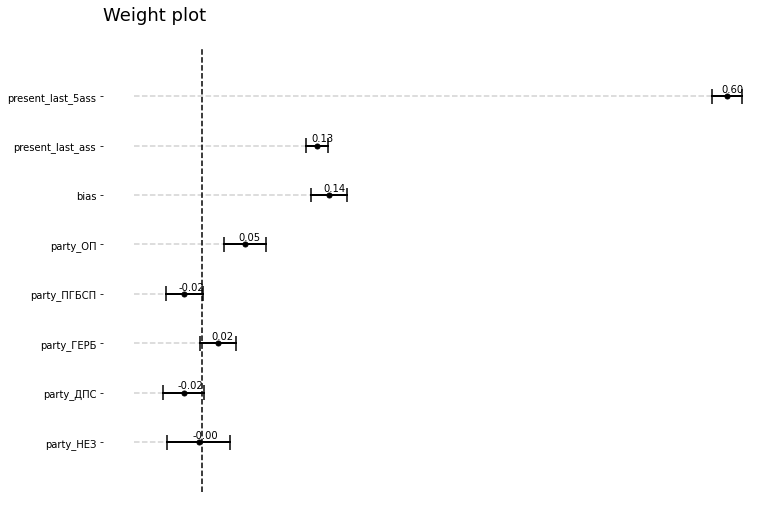

In [48]:
%matplotlib inline
weight_plot(results)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f4aa658b2e0>,
                       lower    median     upper
 feat                                           
 party_ГЕРБ         0.000000  0.000000  0.018306
 party_ДПС         -0.020601 -0.000000 -0.000000
 party_НЕЗ         -0.000000 -0.000000 -0.000000
 party_ОП           0.000000  0.000000  0.048955
 party_ПГБСП       -0.019647 -0.000000 -0.000000
 present_last_ass   0.000000  0.131253  0.131253
 bias               0.144347  0.144347  0.144347
 present_last_5ass  0.000000  0.357659  0.596099)

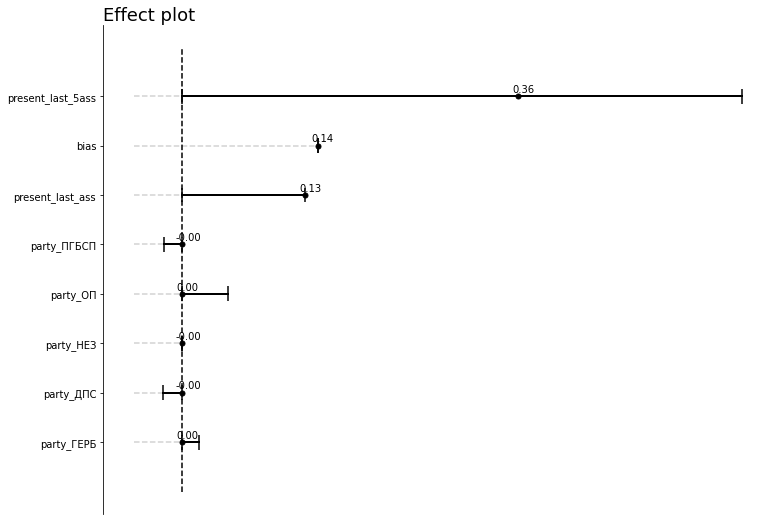

In [49]:
effect_plot(results, features_df)

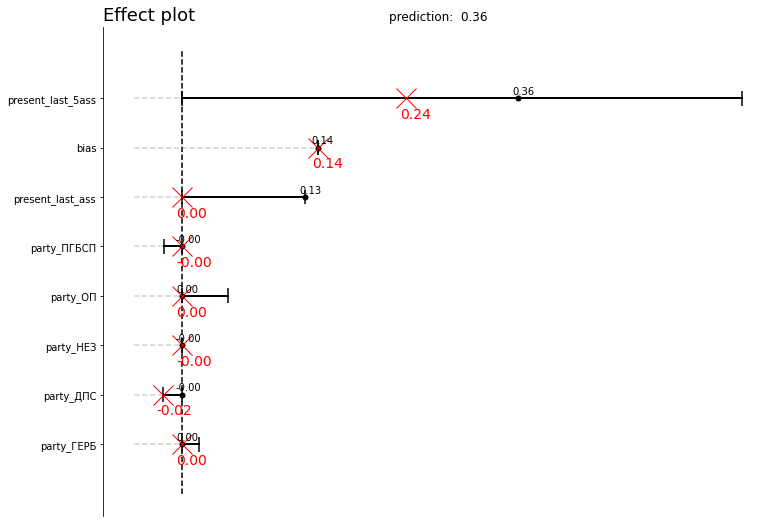

In [71]:
effect_plot_for_example(results, features_df, features_df.iloc[2])

In [64]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


In [76]:

tree = DecisionTreeRegressor(max_depth=3)

In [77]:
model =  tree.fit(features_df, data['present'])

In [78]:
import matplotlib.pyplot as plt

[Text(4464.0, 4280.849999999999, 'present_last_5ass <= 0.5\nmse = 0.248\nsamples = 34914\nvalue = 0.545'),
 Text(2232.0, 3057.75, 'present_last_5ass <= 0.1\nmse = 0.196\nsamples = 15041\nvalue = 0.269'),
 Text(1116.0, 1834.6499999999996, 'party_ПГБСП <= 0.5\nmse = 0.089\nsamples = 6708\nvalue = 0.099'),
 Text(558.0, 611.5500000000002, 'mse = 0.133\nsamples = 3008\nvalue = 0.159'),
 Text(1674.0, 611.5500000000002, 'mse = 0.048\nsamples = 3700\nvalue = 0.051'),
 Text(3348.0, 1834.6499999999996, 'present_last_ass <= 0.5\nmse = 0.241\nsamples = 8333\nvalue = 0.405'),
 Text(2790.0, 611.5500000000002, 'mse = 0.229\nsamples = 5581\nvalue = 0.355'),
 Text(3906.0, 611.5500000000002, 'mse = 0.25\nsamples = 2752\nvalue = 0.506'),
 Text(6696.0, 3057.75, 'present_last_5ass <= 0.7\nmse = 0.186\nsamples = 19873\nvalue = 0.753'),
 Text(5580.0, 1834.6499999999996, 'present_last_ass <= 0.5\nmse = 0.238\nsamples = 5105\nvalue = 0.609'),
 Text(5022.0, 611.5500000000002, 'mse = 0.249\nsamples = 2116\nvalue

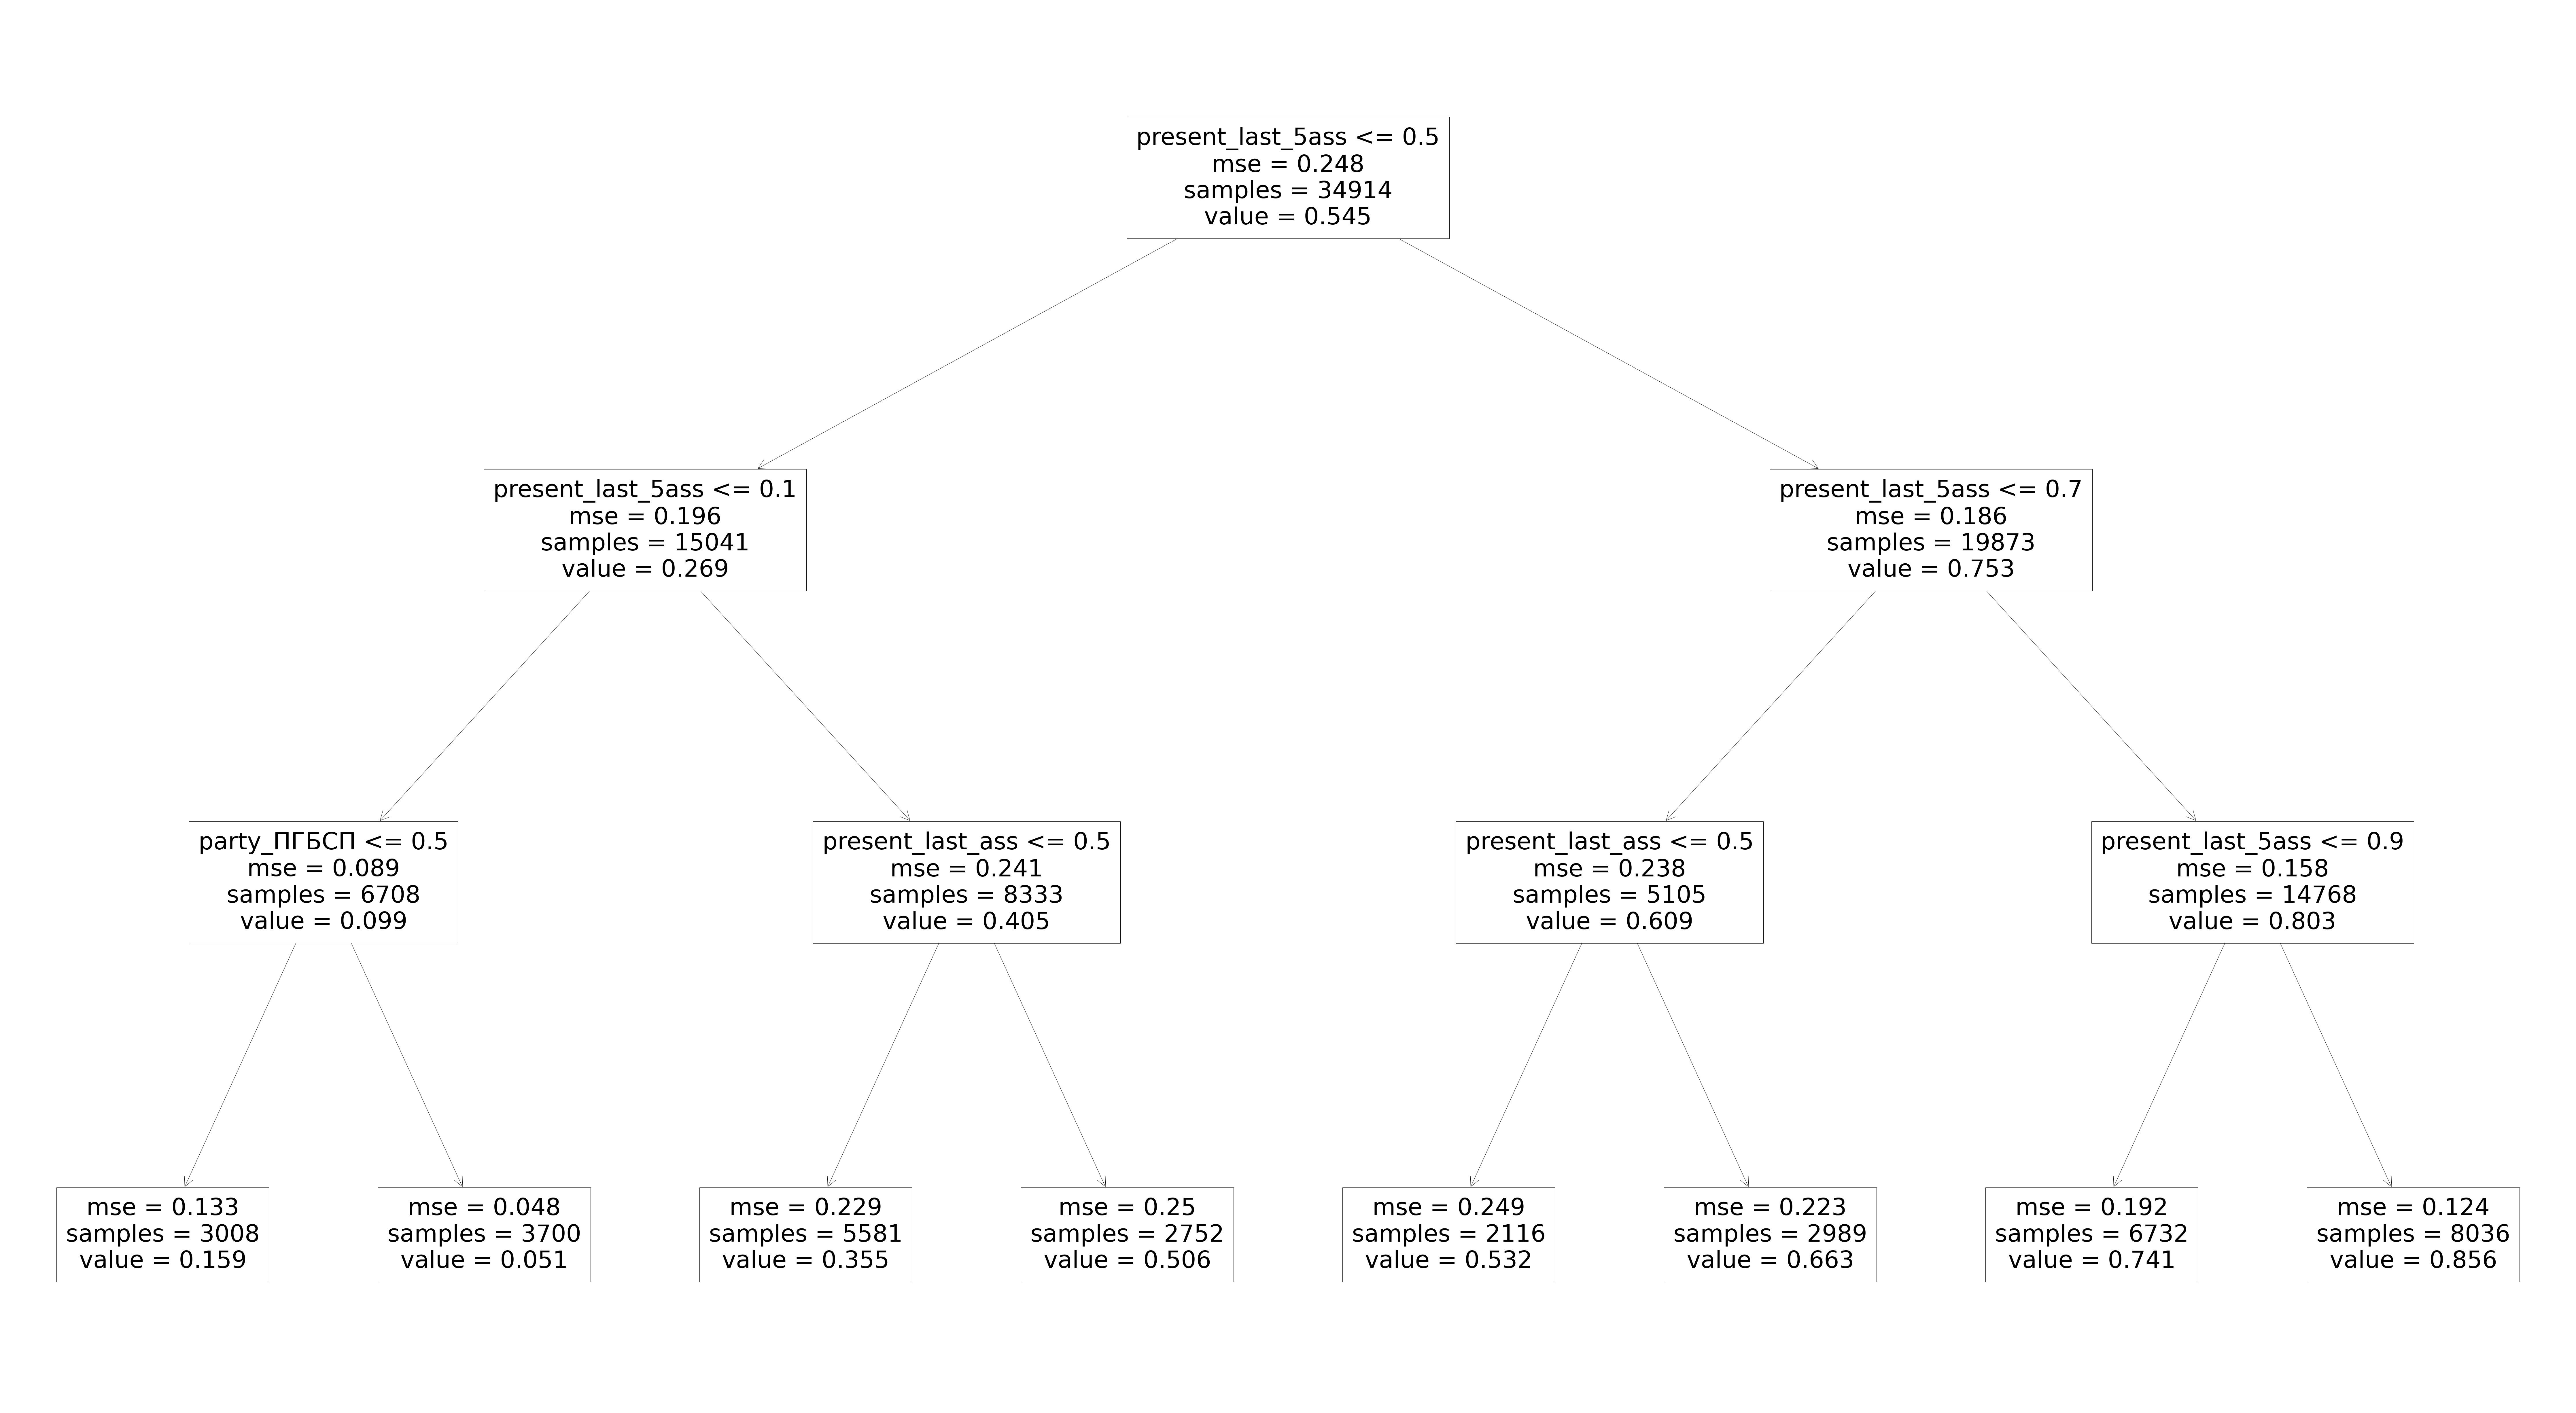

In [79]:
%matplotlib inline
fig, ax =plt.subplots(figsize=(160,90))
plot_tree(model, ax=ax, feature_names=features_df.columns)